## Analysis of Variance (ANOVA) Regression

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann.)*

### __Analysis of Variance (ANOVA)__

The question we want to answer is, how well does the model fit the data and explain the dependent variable?

The purpose of simple linear regression is to explain the *variation* in a dependent variable by the variation in a single independent variable. "Variation" is interpreted as degree to which a variable differs from its mean value (this is similar but not the same as *variance*).

***If we look at one specific data point (x,y), a linear regression tries to explain the variation of the dependent variable from its mean (mean of y = dependent variable) by the variation of for the independent variable from its mean (mean of x = independent variable):***

<img src="../assets/images/variation_from_mean.png" width="60%" />

### __Total Variation in Dependent Variable (TSS)__

Let's have a look at the dependent variable y. We have the data points of the dependent valiable y and the mean value for the dependent y variable. Between the data point and the mean we have the distance, or deviation, from the mean value for every data point. Now we can calculate the total variation by summing up the square distances.

<img src="../assets/images/tss.png" width="60%" />

The total sum of squares is calculated with the following formula:

<img src="../assets/images/tss_formula.png" width="30%" />

For each data point we take the y-value and calculate the distance from y-mean squared, sum up all the squared distances and end up that the total sum of squares.

What we get is the total variation of the dependent variable from its mean.

This is similar, but not equal to the variance: to get the variance we would have to divide TSS by n minus one.

*(Screenshots taken from Alexander Hagmann's Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/).)*


### __Regression Sum of Squares (RSS) Model__

__How many percent of the total variation can be explained by our linear regression model?__

Once again we have our data points, we've the linear regression line and we have the mean values (or the line through the mean values of the dependent variable y that's parallel to the x-axis) of the dependent variable y.

<img src="../assets/images/rss.png" width="60%" />

The total sum of squares is calculated with the following formula:

<img src="../assets/images/rss_formula.png" width="30%" />

For each data point:
- we calculate the difference (or distance) between the predicted y-value on the regression line minus the average y-value
- then we square the calculated distance
- and finally we sum up the squared distances

### __Unexplained Variation in the Dependent Variable (Sum of Squared Errors, SEE)__

The distances between the actual y-values and the predicted y-values are the residuals (the errors) of our linear regression. By summing up these errors, we get the Sum of Squared Errors, SEE.

The sum of squared errors is calculated with the following formula:

<img src="../assets/images/see_formula.png" width="30%" />

### __ANOVA Summary__

<img src="../assets/images/anova_summary.png" width="70%" />

Let's start our summary with the regression line and the data points. If we look at a single data point, this data point has a certain distance to the mean of the dependent variable (y-line, total distance of the real y-value from the mean y-value). This is the __Total Variation TSS__.

This total variation can be split up in

1. the __Explained Variation RSS__, which is the distance that can be explained by the linear regression (distance between the predicted y-value on the regression line from the mean y-value).

2. and the __Unexplained Variation SEE__, which cannot be explained by the linear regression and is the sum of squared errors.

The unexplained variation SEE is equal to the total variation TSS minus the explained variation RSS:

__SEE = TSS - RSS__


*The goal of an ordinary least squares regression is to minimize the sum of squared errors.*

#### __Quantifying the fit of the linear regression model by calculating the coefficient of determination R<sup>2</sup> (R-Squared)__


R<sup>2</sup> is defined as the proportion of the variation in the dependent variable that is ***explained by the independent variable / regression model***. It gives some information about the __goodness of fit__ of a model and can range from 0 (no fit) to 1 (perfect fit).

<img src="../assets/images/r_squared_formula.png" width="50%" />

***In a case were we have only one independent variable (like in this linear regression example) R<sup>2</sup> is actually the squared correlation coefficient r<sup>2</sup>.***

### OLS Regression with Statsmodels - ANOVA

In [96]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [97]:
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [98]:
# dependent variable y (eg. the revenue)
y = np.array([ 2,  6,  7,  7, 11, 10, 15, 15, 18])
y

array([ 2,  6,  7,  7, 11, 10, 15, 15, 18])

In [99]:
y.mean()

np.float64(10.11111111111111)

In [100]:
np.corrcoef(x,y) # correlation coefficient

array([[1.        , 0.97328619],
       [0.97328619, 1.        ]])

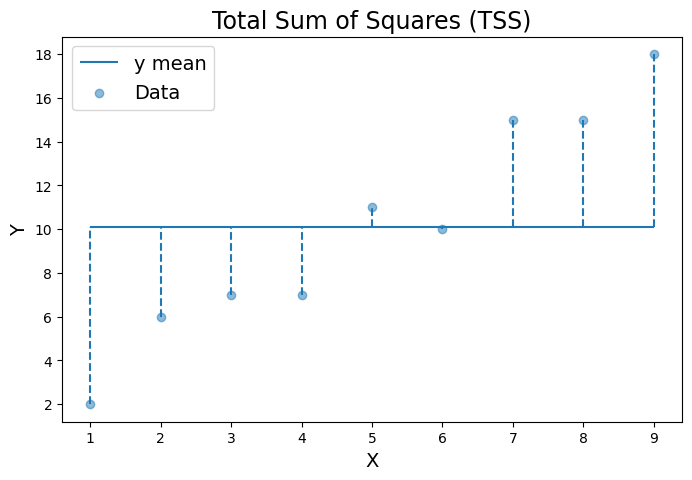

In [101]:
# visualizing the total variation tss
# which is the sum of squared distances of the y-values and the mean of y
plt.figure(figsize = (8, 5))
plt.hlines(y = y.mean(), xmin = 1, xmax = 9, label = "y mean")
plt.scatter(x = x, y = y, alpha = 0.5, label = "Data")
for i in range(len(y)):
    plt.vlines(x[i], ymin = min(y.mean(), y[i]), ymax = max(y.mean(), y[i]), linestyles = "dashed")
plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.title("Total Sum of Squares (TSS)", fontsize = 17)
plt.legend(fontsize = 14)
plt.show()

In [102]:
tss = np.sum((y - y.mean())**2) # calculating the total variation tss with numpy
tss

np.float64(212.88888888888889)

In [103]:
results.centered_tss  # calculating the total variation tss with statsmodels

np.float64(212.88888888888889)

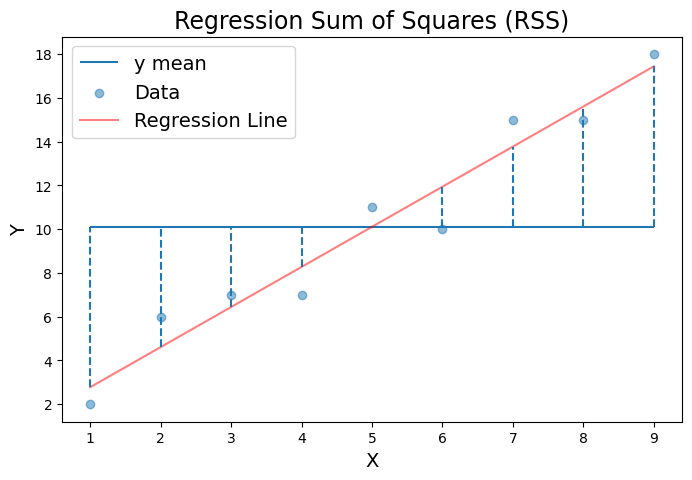

In [104]:
# visualizing the regression sum of squares rss
# the variation that is explained by the linear model 
# which is the sum of squared distances between the predicted y-value and the mean y-value
plt.figure(figsize = (8, 5))
plt.hlines(y = y.mean(), xmin = 1, xmax = 9, label = "y mean")
plt.scatter(x = x, y = y, alpha = 0.5, label = "Data")
plt.plot(x, pred, c = "r", alpha = 0.5, label = "Regression Line")
for i in range(len(y)):
    plt.vlines(x[i], ymin = min(y.mean(), pred[i]), ymax = max(y.mean(), pred[i]), linestyles = "dashed")
plt.xlabel("X", fontsize = 14)
plt.ylabel("Y", fontsize = 14)
plt.title("Regression Sum of Squares (RSS)", fontsize = 17)
plt.legend(fontsize = 14)
plt.show()

In [105]:
rss = np.sum((pred - y.mean())**2) # calculating the regression sum of squares rss with numpy
rss

np.float64(201.66666666666674)

In [106]:
results.mse_model # calculating the regression sum of squares rss with statsmodels
# the name of the function, mse_model, is misleading

np.float64(201.66666666666666)

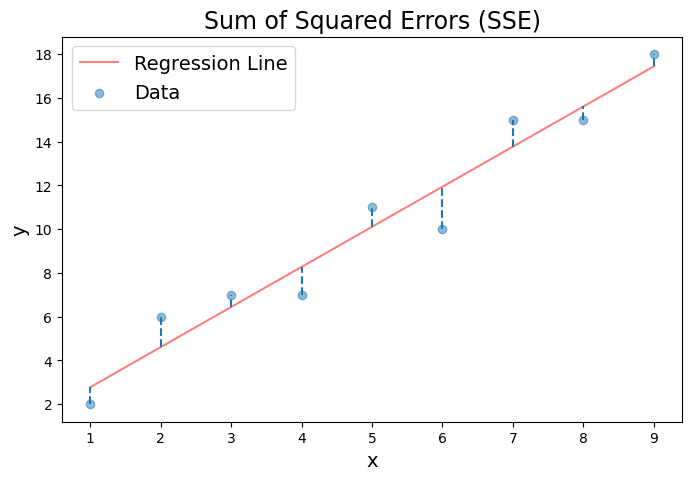

In [107]:
# visualizing the unexplained variation (or sum of squared errors)
plt.figure(figsize = (8, 5))
plt.plot(x, pred, c = "r", alpha = 0.5, label = "Regression Line")
plt.scatter(x = x, y = y, alpha = 0.5, label = "Data")
for i in range(len(y)):
    plt.vlines(x[i], ymin = min(pred[i], y[i]), ymax = max(pred[i], y[i]), linestyles = "dashed")
plt.xlabel("x", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.legend(fontsize = 14)
plt.title("Sum of Squared Errors (SSE)", fontsize = 17)
plt.show()

In [108]:
np.sum((y - pred)**2) # unexplained variation with numpy

np.float64(11.222222222222221)

In [109]:
# another way of calculating the unexplained variation
tss - rss # total variation minus explained variation

np.float64(11.222222222222143)

In [110]:
results.ssr # unexplained variation with statsmodels
# ssr -> sum of squared residuals

np.float64(11.222222222222221)

### Coefficient of Determination - R^2

Calculating the coefficient of determination (or R squared), which indicates how well our regression model fits the data.

In [111]:
tss = results.centered_tss
tss # total variation

np.float64(212.88888888888889)

In [112]:
rss = results.mse_model
rss # explained variation

np.float64(201.66666666666666)

In [113]:
sse = results.ssr
sse # unexplained variation

np.float64(11.222222222222221)

In [114]:
# just checking...
rss + sse == tss # true ?

np.True_

In [115]:
# R squared is the proportion of the variation of the dependent variable 
# that is explained by the independent variable or the regression model
r_squared = rss/tss
r_squared

np.float64(0.947286012526096)

In [116]:
results.rsquared # R squared with statsmodels

np.float64(0.947286012526096)

In [117]:
# in the special case where we only have one independent variable
# the coefficient of determination is equal to the square of the correlation coefficient.
np.corrcoef(x, y)[0,1]**2

np.float64(0.9472860125260961)